# Wrangling Code

In [42]:
options(repr.matrix.max.rows = 6)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(rvest)
library(repr)

In [5]:
url <- read_csv("https://raw.githubusercontent.com/BurakMOzkan/DSCI100_group_3/main/heart.csv?token=GHSAT0AAAAAACJLJJFWYOFYBYRAIITH3IOKZJ4BTPA")
url

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
heart_disease <- url |>
                 select(age, cp, trestbps, chol, thalach) |>
                 rename(chest_pain_type = cp,
                        resting_bp = trestbps,
                        serum_cholesterol = chol,
                        max_heart_rate = thalach)
heart_disease   

age,chest_pain_type,resting_bp,serum_cholesterol,max_heart_rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,0,125,212,168
53,0,140,203,155
70,0,145,174,125
⋮,⋮,⋮,⋮,⋮
47,0,110,275,118
50,0,110,254,159
54,0,120,188,113


In [7]:
# Splitting data into the training and testing data sets:

hd_split <- initial_split(heart_disease, prop = 0.80, strata = chest_pain_type)
hd_train <- training(hd_split)
hd_test <- testing(hd_split) 
glimpse(hd_train)

Rows: 818
Columns: 5
$ age               <dbl> 52, 53, 70, 61, 62, 55, 46, 54, 71, 43, 51, 52, 54, …
$ chest_pain_type   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ resting_bp        <dbl> 125, 140, 145, 148, 138, 160, 120, 122, 112, 132, 14…
$ serum_cholesterol <dbl> 212, 203, 174, 203, 294, 289, 249, 286, 149, 341, 29…
$ max_heart_rate    <dbl> 168, 155, 125, 161, 106, 145, 144, 116, 125, 136, 12…


In [19]:
# TABLE 1: the number of observations per type and their abundance of the response variable

chest_pain_prop <- hd_train |>
                   group_by(chest_pain_type) |>
                   summarize(n = n()) |>
                   mutate(percent = 100*n/nrow(hd_train))

chest_pain_prop

# TABLE 2: the average for all predictors

average_predictor <- hd_train |>
                     select(age, resting_bp, serum_cholesterol, max_heart_rate) |>
                     map_dfr(mean)
average_predictor

chest_pain_type,n,percent
<dbl>,<int>,<dbl>
0,394,48.16626
1,134,16.38142
2,225,27.50611
3,65,7.94621


age,resting_bp,serum_cholesterol,max_heart_rate
<dbl>,<dbl>,<dbl>,<dbl>
54.52689,132.0196,245.2323,149.1601


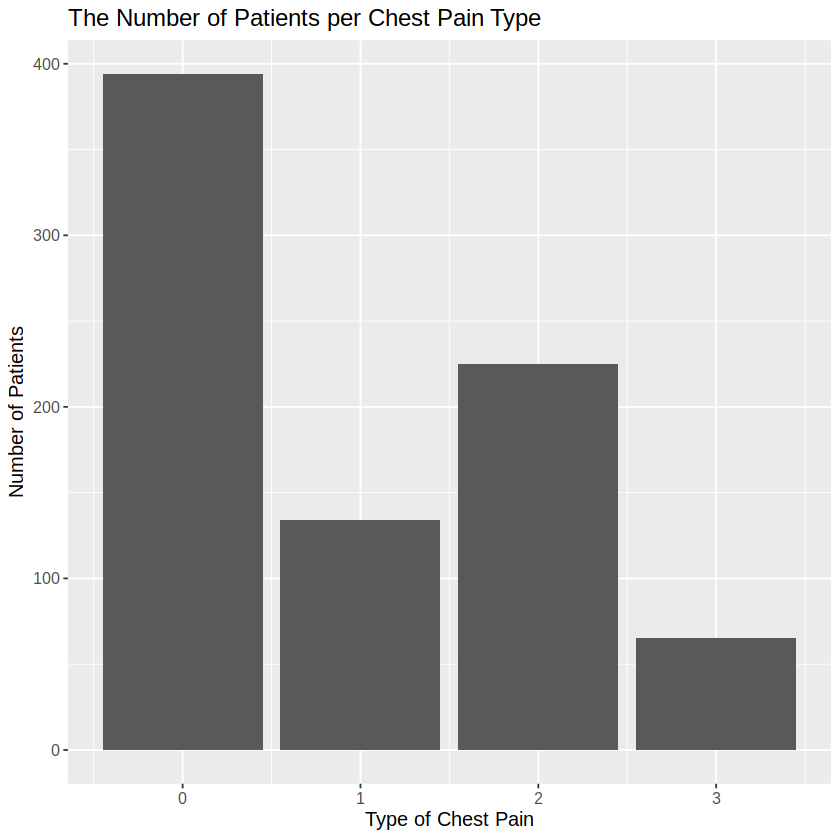

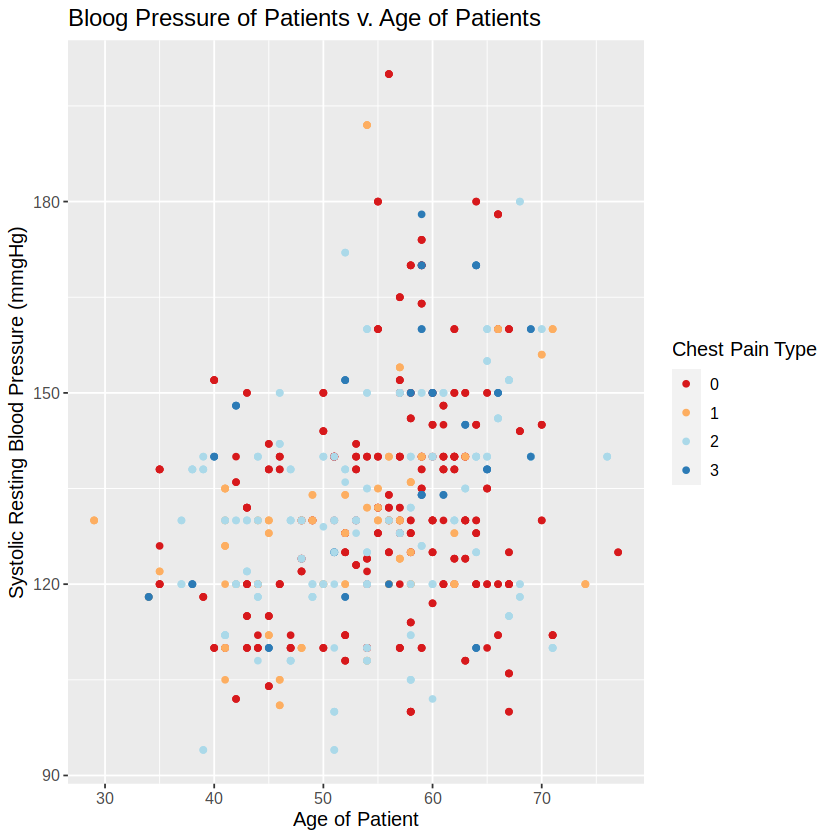

In [48]:
# Bar graph for the chest pain type:

chest_pain_bar <- hd_train |>
                  ggplot(aes(x = chest_pain_type)) +
                  geom_bar() +
                  labs(x = "Type of Chest Pain", y = "Number of Patients",  fill = "Chest Pain Type") +
                  ggtitle("The Number of Patients per Chest Pain Type") +
                  theme(text = element_text(size = 12)) 
chest_pain_bar

# Visualizing each predictor against age and grouping with regards to the chest pain type:

resting_bp_plot <- hd_train |>
                   ggplot(aes(x = age, y = resting_bp, color = as_factor(chest_pain_type))) +
                   geom_point() +
                   labs(x = "Age of Patient", y = "Systolic Resting Blood Pressure (mmgHg)",  color = "Chest Pain Type") +
                   ggtitle("Bloog Pressure of Patients v. Age of Patients") +
                   theme(text = element_text(size = 12), legend.position = "right", legend.direction = "vertical") +
                   scale_color_brewer(palette = "RdYlBu")
resting_bp_plot